## Bootcamp: Ciencia de Datos e Inteligencia Artificial
## Proyecto del Módulo 4: Modelado no supervisado en Machine Learning
¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 4! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Lee el caso y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

## Objetivos
- Diseñarás y aplicarás un modelo de *clustering*.
- Indicarás la cantidad óptima de grupos dado un conjunto que se te proporcionará.
- Generarás visualizaciones para *clustering* y método del codo.
- Usarás por lo menos un índice de desempeño para evaluar el modelo.


## Caso de estudio

Una empresa financiera tiene un nuevo producto dirigido a sus clientes con diferentes límites de crédito, por ello, es necesario dividir a los clientes en grupos más pequeños.

Desafortunadamente, los directivos no tienen idea de cuál es la cantidad óptima en la que se puede segregar a los clientes y cómo dirigir a nuevos clientes a esos grupos.

Es por eso que en este punto se te ha contratado. Para poder ejecutar tu trabajo te han compartido una base de datos que contiene las características que, según sus informes, son los más importantes para la aplicación de este programa. Consiste en seis puntos:
- **Salario mensual:** indica el ingreso mensual del cliente en pesos mexicanos.
- **Crédito tipo 1:** es un producto financiero que el cliente ha obtenido de la institución financiera; `1` significa que tiene este producto y `0` que no cuenta con él.
- **Crédito tipo 2:** es similar a las características del anterior; `1` significa que cuenta con el producto y `0` que no.
- **Límite de TC:** indica el límite de crédito de la tarjeta del cliente.
- **Años siendo cliente:** corresponde al tiempo que el cliente ha tenido una relación comercial con la institución financiera.
- **Previamente se ofreció el producto:** es la versión previa del producto e indica si el cliente se mostró interesado en obtenerlo (`1`) o no (`0`).

El archivo puede ser descargado aquí: https://drive.google.com/file/d/1wcjPCZPTMuDlyWcE1Do4-yqU5AglW_p9/view?usp=sharing

### Observaciones

El cliente requiere que le indiques la cantidad óptima de grupos en los que deberás catalogar a sus clientes. Para ello, usa el método del codo y grafícalo. Recuerda que tus clientes necesitan apoyos visuales.

Una vez que tengas la cantidad de grupos óptimos, deberás aplicar un método de *clustering*. El cliente solicita que le muestres gráficamente cómo están organizados los clientes. Para ello, usa una gráfica de dispersión o la que creas más conveniente.

Incluye, por lo menos, un índice de desempeño (*scoring*) para complementar tus análisis.

Tus visualizaciones deberán tener título y estar presentables. Puedes usar **Pyplot** o **Seaborn**.

Deberás escribir un texto explicando qué representa tu análisis. Usa un lenguaje que vaya dirigido a personas que no saben de ciencia de datos o matemáticas, esto es muy común en la realidad. Deberás hablar de tu gráfica, tus resultados y el manejo de la información, así como del beneficio de usar tu modelo.

Como reto adicional se te proprocionará un archivo en la liga siguiente: https://drive.google.com/file/d/1Nkoc-6AeC3Vzy7gfCNB_DlWTs4dXz7Ug/view?usp=sharing, la cual incluye 50 clientes más. Deberás aplicar el método que usaste para entrenar con tu primer modelo y aplicarlo en estos nuevos clientes. No olvides graficarlos (solo a los nuevos 50 clientes).


## Criterios de evaluación

Modelar el *clustering* correctamente:
- Determinar el número máximo de *clusters* y aplicar PCA (**2 puntos**).
- Hacer el diagrama de codo (**2 puntos**); si no tiene títulos, leyendas y etiquetas, solo tendrás **1 punto**.
- Seleccionar y entrenar modelo (**2 puntos**); si no tiene títulos, leyendas y etiquetas, solo tendrás **1 punto**.
- Generar la visualización de datos con un diseño personalizado y agregar títulos y leyendas (**2 puntos**).
- Evaluar el desempeño aplicado y explicar el modelo, la gráfica y el uso de datos a una persona que no es científica de datos (**2 puntos**). Si las explicaciones son dudosas, equivocadas o sin comentarios suficientes, solo tendrás **1 punto**.

**Punto extra**
- Si aplicas el mismo modelo que ya creaste en los nuevos 50 registros, obtendrás **1 punto** extra.
 **Nota:** No debes realizar un nuevo modelo, sino aplicar el ya hecho.
- Si estos nuevos 50 registros se agregan a los registros previos con los que diseñaste la primera gráfica, tendrás **1 punto** extra. Puedes diferenciarlos cambiándoles la forma, color o tamaño; así resaltarán más. Este punto no es válido si la grafica no tiene títulos, etiquetas y leyendas.

¡Éxito! Te vemos en el contenido del siguiente módulo.

# Parte 1

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Proyecto Modulo 4/costumers.csv')

In [ ]:
df.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,22572.91,1,0,30136.74,0.0,1
1,10609.64,1,1,53623.94,0.0,1
2,10079.48,0,1,18135.44,0.0,0
3,13871.35,1,0,30831.75,0.0,1
4,6541.46,0,1,20626.23,0.0,0


## Análisis exploratorio

In [ ]:
df.describe()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,12089.097380,0.610000,0.458000,44784.554960,4.327000,0.602000
std,5123.700116,0.488238,0.498732,22150.923996,4.784776,0.489976
min,-2911.650000,0.000000,0.000000,-22207.950000,0.000000,0.000000
25%,8534.350000,0.000000,0.000000,30096.285000,0.000000,0.000000
50%,11438.600000,1.000000,0.000000,47991.515000,0.000000,1.000000
75%,15171.467500,1.000000,1.000000,59108.175000,8.400000,1.000000
max,30041.400000,1.000000,1.000000,118636.820000,19.300000,1.000000


In [ ]:
# Verificamos si existen datos nulos
df.isnull().sum()

,0
Salario,0
Credito_tipo_1,0
Credito_tipo_2,0
Limite_TC,0
Tiempo_cliente,0
Producto_ofrecido,0


In [ ]:
# Vemos la distribución de las variables
sns.set_style("whitegrid")
plt.figure(figsize=(30, 30))

<Figure size 3000x3000 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

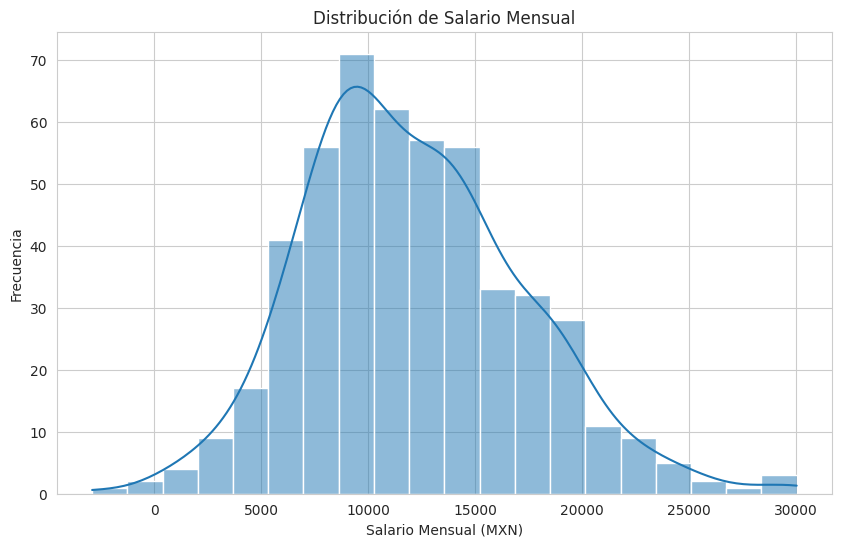

In [ ]:
#Histograma Salario Mensual
plt.figure(figsize=(10, 6))
sns.histplot(df['Salario'], kde=True)
plt.title('Distribución de Salario Mensual')
plt.xlabel('Salario Mensual (MXN)')
plt.ylabel('Frecuencia')
plt.show()


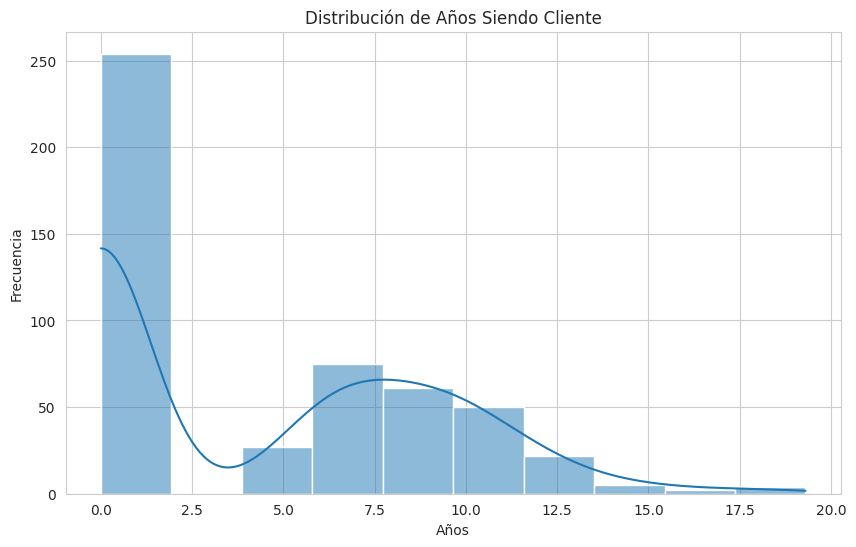

In [ ]:
# Histograma Tiempo cliente
plt.figure(figsize=(10, 6)) # Adjust the figure size
sns.histplot(df['Tiempo_cliente'], kde=True)
plt.title('Distribución de Años Siendo Cliente')
plt.xlabel('Años')
plt.ylabel('Frecuencia')
plt.show()


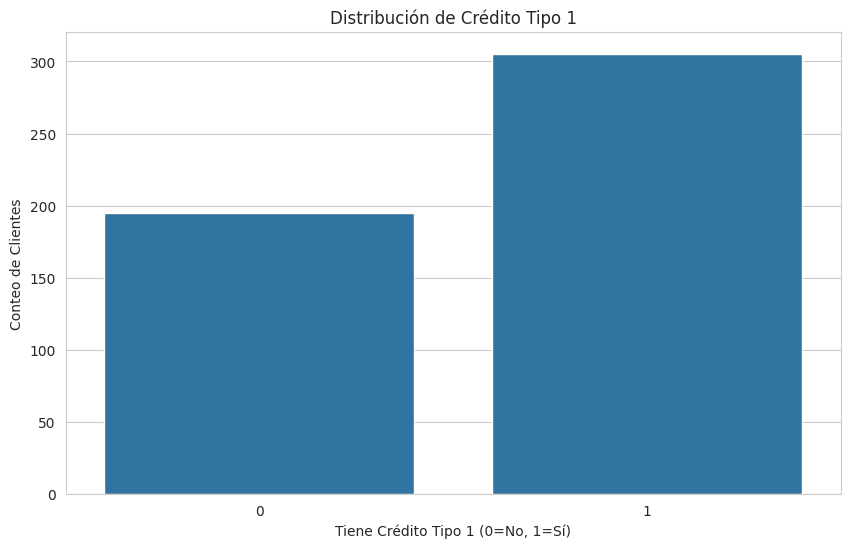

In [ ]:
# Variables Binarias Credito tipo 1
plt.figure(figsize=(10, 6))
sns.countplot(x='Credito_tipo_1', data=df)
plt.title('Distribución de Crédito Tipo 1')
plt.xlabel('Tiene Crédito Tipo 1 (0=No, 1=Sí)')
plt.ylabel('Conteo de Clientes')
plt.show()

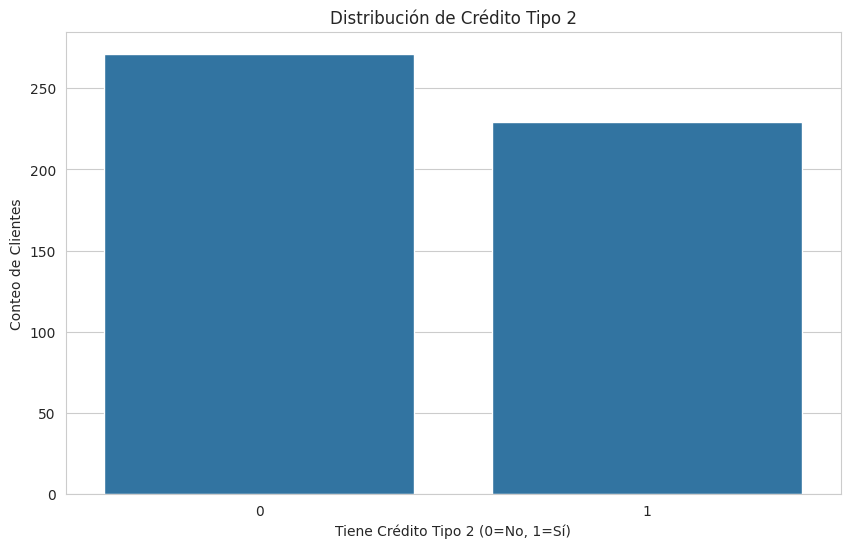

In [ ]:
# Variables binarias credito tipo 2
plt.figure(figsize=(10, 6))
sns.countplot(x='Credito_tipo_2', data=df)
plt.title('Distribución de Crédito Tipo 2')
plt.xlabel('Tiene Crédito Tipo 2 (0=No, 1=Sí)')
plt.ylabel('Conteo de Clientes')
plt.show()

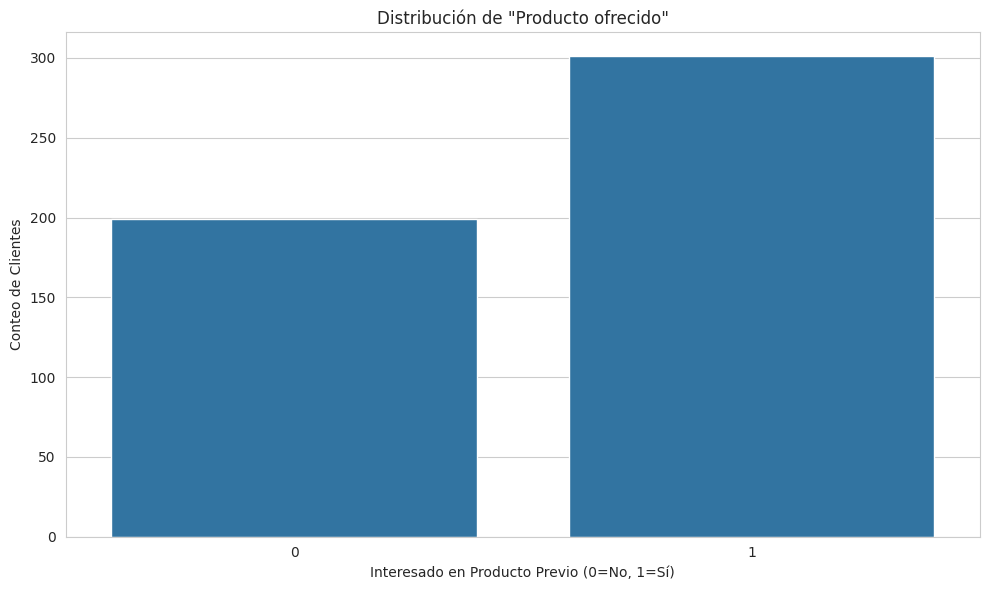

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Producto_ofrecido', data=df)
plt.title('Distribución de "Producto ofrecido"')
plt.xlabel('Interesado en Producto Previo (0=No, 1=Sí)')
plt.ylabel('Conteo de Clientes')
plt.tight_layout()
plt.show()

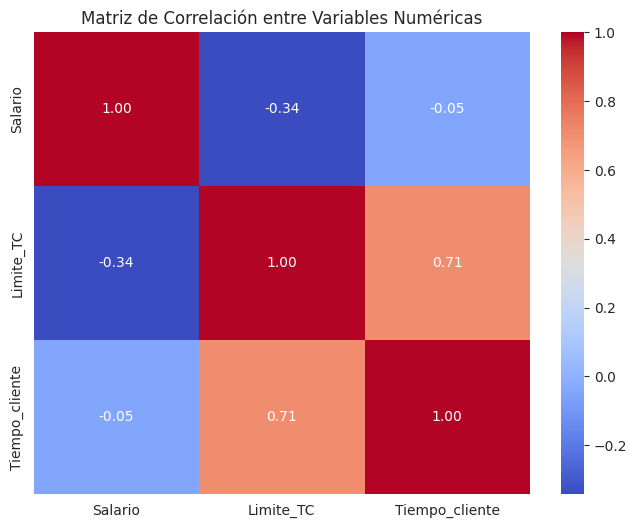

In [ ]:
# Matriz de correlación para variables numericas continuas
plt.figure(figsize=(8, 6))
correlation_matrix = df[["Salario", 'Limite_TC', 'Tiempo_cliente']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

Conclusiones:
1. La distribución del salario mensual y el tiempo como cliente muestran que existe una gran variación en los dos, esto sugiere que hay una diversidad de clientes en temas de ingresos y de antiguedad. Esta variabilidad se considera importante porque indica que no todos los clientes son iguales y por ende podremos encontrar grupos distintos basándose en estas características.
2. La distribución los productos financieros y el interés en el producto previo nos muestra que la proporción de clientes que tienen creditos de tipo 1, 2 o que mostraron interés. Podemos ver la cantidad de clientes que ya cuentan con los productos o que estuvieron interesados previamente. Con esto podemos tener un indicador de su propensión a adquirir el nuevo producto.
3. Con la matriz de correlación podemos ver que entre el "Salario" y el "Limite_TC" hay una correlación de -0.34, lo que sugiere que, a medida que el salario aumenta, el límite de la tarjeta de crédito tiende a disminuir ligeramente o visceversa. Para el contexto en el que estamos esto puede ser porque los clientes con salarios mas altos tienen menos necesidad de límites de crédito muy altos, o bien que el banco puede tener otras métricas para asignar los limites a este segmento de clientes.

## Escalado

In [ ]:
scaler = StandardScaler()

In [ ]:
df_scaled = scaler.fit_transform(df)

In [ ]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)


In [ ]:
df_scaled.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,2.048190,0.799590,-0.919249,-0.661936,-0.905232,0.813099
1,-0.289037,0.799590,1.087845,0.399452,-0.905232,0.813099
2,-0.392613,-1.250641,1.087845,-1.204275,-0.905232,-1.229863
3,0.348193,0.799590,-0.919249,-0.630528,-0.905232,0.813099
4,-1.083825,-1.250641,1.087845,-1.091716,-0.905232,-1.229863


## Determinamos numero de clusters

In [ ]:
inertia = []

In [ ]:
k_range = range(1, 11) # Probamos de 1 a 10 clusters


In [ ]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

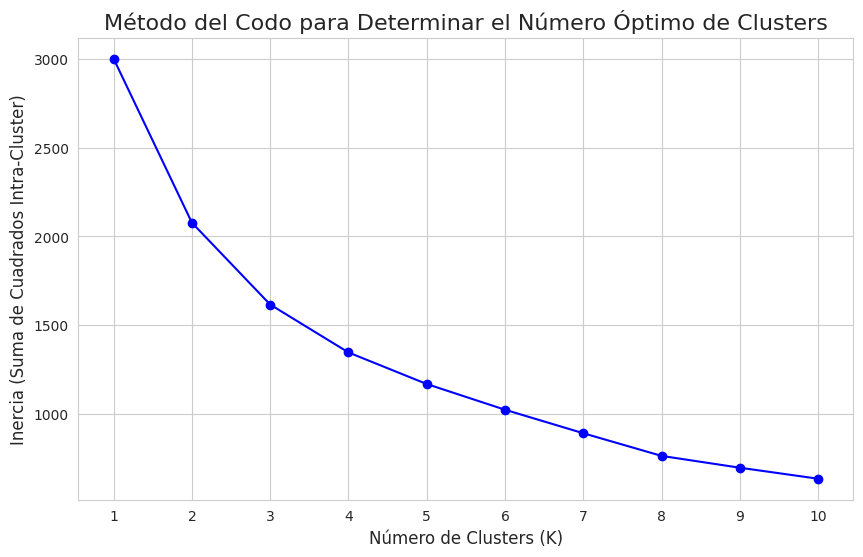

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-', color='blue')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters', fontsize=16)
plt.xlabel('Número de Clusters (K)', fontsize=12)
plt.ylabel('Inercia (Suma de Cuadrados Intra-Cluster)', fontsize=12)
plt.xticks(k_range)
plt.grid(True)
plt.show()

Se considera K = 3

In [ ]:
optimal_k = 3

## Aplicamos metodo de clustering (K-means)

In [ ]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(df_scaled)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [ ]:
# Asignamos etiquetas de los clusters a los datos originales
df['Cluster'] = kmeans.labels_
df_scaled['Cluster'] = kmeans.labels_

##Reducción de dimensionalidad para visualización (PCA)

In [ ]:
# No consideramos la columna "Cluster"
pca = PCA(n_components=2, random_state=42)
principal_components = pca.fit_transform(df_scaled.drop('Cluster', axis=1))

In [ ]:
# Creamos un nuevo dataframe con los componentes principales
pca_df = pd.DataFrame(data=principal_components,
                      columns=['Componente Principal 1', 'Componente Principal 2'])

In [ ]:
# Añadimos etiquetas de los clusters al dataframe de PCA para su visualización
pca_df['Cluster'] = df['Cluster']

In [ ]:
print(f"Varianza explicada por las 2 componentes principales: {pca.explained_variance_ratio_.sum():.2f}")


Varianza explicada por las 2 componentes principales: 0.66


Se aplica PCA despues del método de clustering por dos razones:
1. Poder maximizar la información para el agrupamiento, para que el k-means pueda hacer el mejor trabaj posible encontrando los grupos naturales, debe acceder a toda la información que esté disponible en características originales, ya que si se entrena el k-means con datos reducidos por pca, el algoritmo estaría trabajando con una versión mas "comprimida" y menos detallada de los datos.
2. Definición de clusters, ya que los clusters de k-means se definen en el espacio de las características originales. Por ejemplo un cluster de "clientes con alto salario, alto límite de tc y que si tenían el credito tipo 1", al entrenarlo en PCA, la interpretación de que "significa" cada cluster se vuelve mucho mas compleja, esto porque sus componentes principales son combinaciones abstractas de las características originales.

## Visualización de datos con diseño personalizado

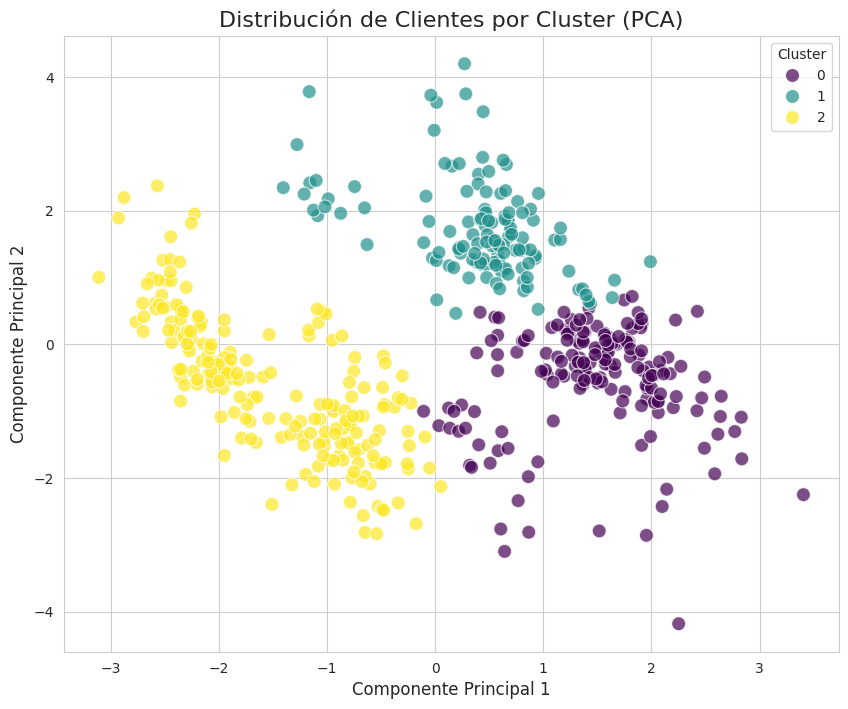

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Componente Principal 1', y='Componente Principal 2',
                hue='Cluster',
                palette='viridis',
                s=100,
                alpha=0.7,
                data=pca_df,
                legend='full')
plt.title('Distribución de Clientes por Cluster (PCA)', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


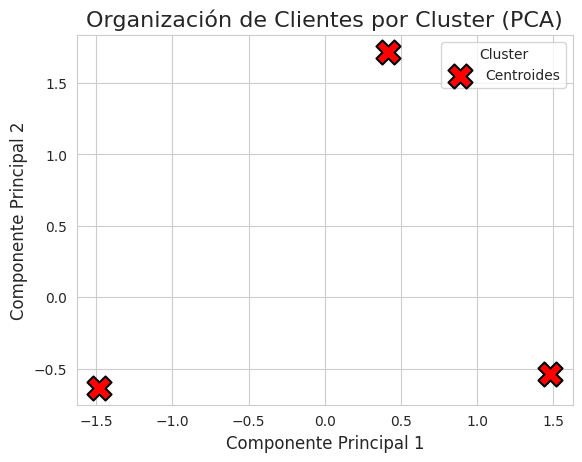

In [ ]:
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1],
            marker='X', s=300, color='red', label='Centroides', edgecolor='black', linewidth=1.5)


plt.title('Organización de Clientes por Cluster (PCA)', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## Índice de desempeño

In [ ]:
# Se calcula el silhouette score usando los datos escalados y etiquetas de cluster
silhouette_avg = silhouette_score(df_scaled.drop('Cluster', axis=1), kmeans.labels_)
print(f"\nEl Silhouette Score para los {optimal_k} clusters es: {silhouette_avg:.3f}")



El Silhouette Score para los 3 clusters es: 0.307


## Explicación

Se ha completado el análisis que se solicitó para poder entender y organizar mejor a los clientes de cara al lanzamiento de un nuevo producto financiero. El objetivo de este proyecto fue dividir a los clientes actuales en grupos con características similares sin saber antes cuantos grupos existen; esto permite ofrecer productos mas personalizados y que los esfuerzos de marketing sean mas efectivos.

Imaginemos primero que tenemos una canasta con diferentes tipos de frutas, nuestro trabajo fue crear una forma inteligente de poder organizar estas frutas en canastas mas pequeñas pero sin que nadie dijera previamente que fruta es la que nos entregan, la idea es que las frutas mas parecidas terminen en la misma canasta. Para esto se utilizó una técnica de aprendizaje automático llamada "K-means", y consiste en una especie de organizador muy eficiente, sin embargo, antes de organizar necesitamos saber cuantas "canastas" debíamos crear.

Para determinar esta cantidad de "canastas" ideal de grupos se utilizó el "Método del Codo", esto se explica como un grafico que muestra el "grado de desorden" dentro de cada canasta. Si hay una sola canasta para todas las frutas, el desorden sería muy grande, pero a medida que vamos creando mas canastas, el desorden va disminuyendo, sin embargo, llegamos a un punto donde añadir otra canasta ya no reduce el desorden significativamente, graficamente hablando es como si la curva de gráfico hiciera un "codo" y se aplana, ese "codo" es donde encontramos el balance perfecto.

Según el análisis realizado, el punto ideal para organizar a los clientes fue en 3 grupos distintos, esto significa que podemos identificar tres perfiles de clientes bien diferenciados.

Para poder ver como se organizan estos grupos, se ha creado una gráfica de dispersión con nombres de ejes "Componente principal 1" y "Componente principal 2", la mejor forma de explicar esto es pensar que se tomaron todas las características importantes de los clientes (como salario, limite de credito, años como cliente, etc) y las simplificamos en solo dos "resúmenes" para poder dibujarlos de forma fácil en un mapa.

En este mapa, cada punto representa a un cliente, y es el color del punto el que indica a que grupo fue asignado. Se observa en el gráfico de nombre "Distribución de clientes por clusters (PCA)" como los clientes se agrupan en tres "nubes" de colores distintos, mientras que en el grafico "Organizacion de clientes por clusters (PCA)" las "X" rojas indican los "clientes típicos" o el "centro de cada grupo.

Para poder asegurar que estos grupos no estan mezclados o superpuestos, realizamos el calculo de un indicador llamado "Silhouette Score", este valor va de -1 a 1. Un valor cercano a 1 significa que los grupos están muy bien separados y los clientes dentro de cada grupo son muy similares entre si. Un valor cercano a 0 significa por tanto que los grupos se mezclan. Los valores negativos significarian por tanto que la asignación fue incorrecta.

Este modeo obtuvo un Silhouette Score de 0.307, indicando que los clientes están agrupados de manera coherente con cada grupo teniendo características distintivas y estando separados de otros de forma razonable.

Es importante señalar que este modelo no solo categoriza a clientes actuales, sino que también permite clasificar nuevos clientes de forma automática en uno de los tres grupos, lo que asegura que la estrategia de segmentación sea consistente a medida que la base de clientes va creciendo.

# Reto adicional

Aplicamos el modelo a nuevos clientes

In [ ]:
df_2 = pd.read_csv('/content/drive/MyDrive/Proyecto Modulo 4/new_costumer.csv')

In [ ]:
df_2.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido,Tipo_de_cliente
0,19028.02,1,0,18845.91,0.0,1,3
1,17004.81,1,0,16421.36,0.0,0,2
2,12973.54,1,0,57295.44,9.6,1,2
3,13995.43,0,0,23556.17,7.7,0,3
4,13155.66,0,1,61073.59,10.2,1,0


In [ ]:
# Escalamos los datos nuevos con el Scaler entrenado previamente
df_2_scaled = scaler.transform(df_2.drop('Tipo_de_cliente', axis=1))
df_2_scaled = pd.DataFrame(df_2_scaled, columns=df.drop('Cluster', axis=1).columns)

In [ ]:
df_2_scaled.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,1.355636,0.799590,-0.919249,-1.172169,-0.905232,0.813099
1,0.960368,0.799590,-0.919249,-1.281734,-0.905232,-1.229863
2,0.172791,0.799590,-0.919249,0.565368,1.103141,0.813099
3,0.372434,-1.250641,-0.919249,-0.959312,0.705650,-1.229863
4,0.208371,-1.250641,1.087845,0.736102,1.228664,0.813099


In [ ]:
# Precedimos los clusters para los nuevos clientes utilizando el K-means ya entrenado
new_customer_clusters = kmeans.predict(df_2_scaled)
df_2['Cluster'] = new_customer_clusters

## Preparamos la visualización combinada

Nos aseguramos que df_scaled no tiene la columna "Cluster" antes del PCA, ya que queremos evitar que el PCA aprenda de esta columna y asi se entrene consistentemente en las caracteristicas originales.

In [ ]:
if 'Cluster' in df_scaled.columns:
    df_scaled_for_pca = df_scaled.drop('Cluster', axis=1)
else:
    df_scaled_for_pca = df_scaled.copy()

In [ ]:
# Concatenamos los dataframes escalados sin la columna "cluster"
df_combined_scaled = pd.concat([df_scaled_for_pca, df_2_scaled], ignore_index=True)

In [ ]:
# Aplicamos PCA con re-fit PCA en los datos combinados con la finalidad de asegurar proyecciones consistentes
pca_combined = PCA(n_components=2, random_state=42)
principal_components_combined = pca_combined.fit_transform(df_combined_scaled)

In [ ]:
# Creamos un nuevo df para la visualización combinada
pca_combined_df = pd.DataFrame(data=principal_components_combined,
                               columns=['Componente Principal 1', 'Componente Principal 2'])

In [ ]:
# Añadimos las etiquetas de clusters a los datos combinados
# Primero las etiquetas de los clientes originales, luego las de los nuevos
pca_combined_df['Cluster'] = pd.concat([df['Cluster'], df_2['Cluster']], ignore_index=True)

In [ ]:
# Añadimos una columna para diferenciar entre clientes 'Original' y 'Nuevo'
pca_combined_df['Tipo de Cliente'] = ['Original'] * len(df) + ['Nuevo'] * len(df_2)


## Visualización Combinada

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


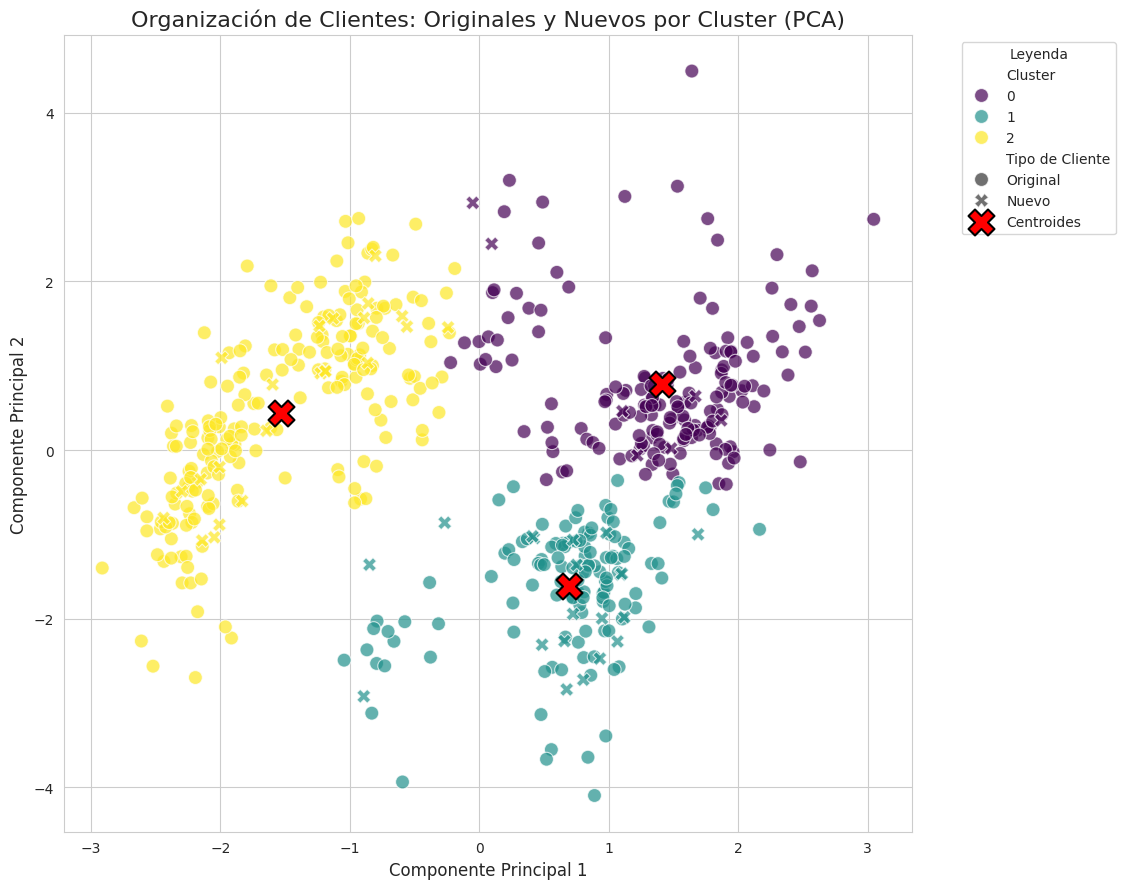

In [ ]:
plt.figure(figsize=(12, 9))
sns.scatterplot(x='Componente Principal 1', y='Componente Principal 2',
                hue='Cluster',
                style='Tipo de Cliente', # Diferencia 'Original' de 'Nuevo' por estilo de marcador
                palette='viridis',
                s=100,
                alpha=0.7,
                data=pca_combined_df,
                legend='full')
cluster_centers_pca_combined = pca_combined.transform(kmeans.cluster_centers_)
plt.scatter(cluster_centers_pca_combined[:, 0], cluster_centers_pca_combined[:, 1],
            marker='X', s=350, color='red', label='Centroides', edgecolor='black', linewidth=1.5, zorder=5)
plt.title('Organización de Clientes: Originales y Nuevos por Cluster (PCA)', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.legend(title='Leyenda', bbox_to_anchor=(1.05, 1), loc='upper left') # Mover leyenda para que no se solape
plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.95, 1]) # Ajustar layout para la leyenda
plt.show()